In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import glob

# Caminantes Aleatorios

In [2]:
#Importamos los datos
X = np.loadtxt('./Data/DataRW.dat')

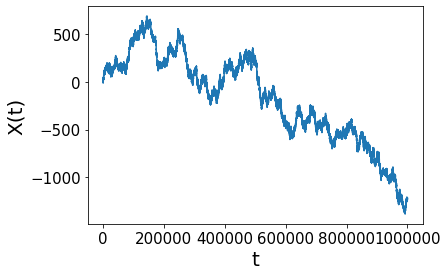

In [3]:
#Graficamos un caminante aleatorio
plt.plot(X)
plt.xlabel("t", size = 20)
plt.ylabel('X(t)', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

#Creamos 10 caminantes aletorios y graficamos
for i in range(10):
    !./RW.out
    X = np.loadtxt('DataRW.dat')
    plt.plot(X)
plt.xlabel("t", size = 20)
plt.ylabel('X(t)', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

## Datos del ensamble

In [5]:
#Importamos los datos
X = np.loadtxt('./Data/DataRW_Ensamble.dat')
val, freq = np.unique(X,return_counts = True)

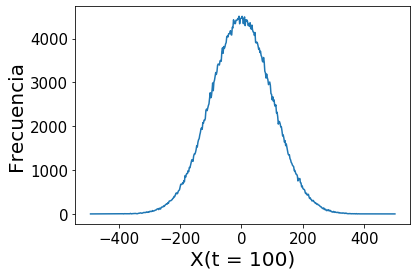

In [6]:
plt.plot(val,freq)
plt.xlabel("X(t = 100)", size = 20)
plt.ylabel('Frecuencia', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

# Tiempo Medio de Primer Paso $T_{0 \rightarrow 1}$

In [7]:
#Importamos los datos
X = np.loadtxt(r'./Data/T 0-_ 1.dat')

In [8]:
probabilidad = pd.DataFrame(X).groupby(0).mean().index
tiempo_promedio = pd.DataFrame(X).groupby(0).mean()[1]

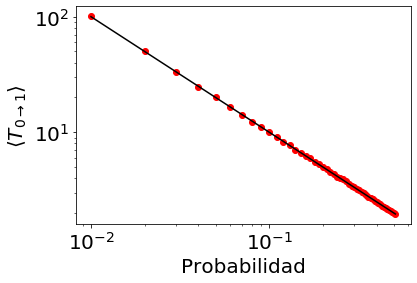

In [9]:
#Comparacion de probabilidad con la teoria 
plt.loglog(probabilidad, tiempo_promedio, 'ro')
plt.loglog(probabilidad, 1/probabilidad, 'k-')
plt.xlabel("Probabilidad", size = 20)
plt.ylabel(r'$ \langle T_{0 \rightarrow 1} \rangle $', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

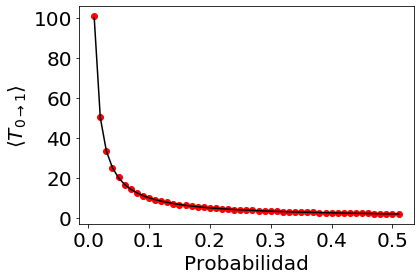

In [10]:
#Comparacion de probabilidad con la teoria 
plt.plot(probabilidad, tiempo_promedio, 'ro')
plt.plot(probabilidad, 1/probabilidad, 'k-')
plt.xlabel("Probabilidad", size = 20)
plt.ylabel(r'$ \langle T_{0 \rightarrow 1} \rangle $', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [11]:
#Ahora haremos un histograma de cada p
X = pd.DataFrame(X)
probs = X[0].unique()

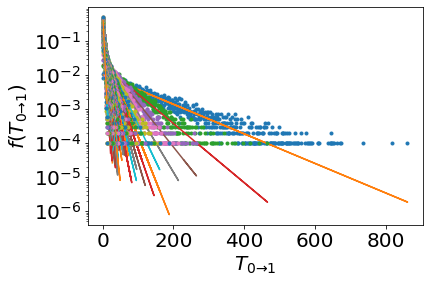

In [12]:
#Probabilidad para p
for i in probs:
    tiempo_medio = X[X[0] == i][1].value_counts().index
    frecuencia = X[X[0] == i][1].value_counts().values
    plt.semilogy(tiempo_medio, frecuencia/sum(frecuencia), '.', label = i)
    plt.semilogy(tiempo_medio, np.exp(-i*tiempo_medio)/np.sum(np.exp(-i*tiempo_medio)))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel(r"$T_{0 \to 1}$", size = 20)
plt.ylabel(r'$f(T_{0 \to 1})$', size = 20)
#plt.legend()
#plt.set( ylim=(-100, 100))
plt.show()

# Tiempo Medio de Primer Retorno $T_{0 \rightarrow 0}$

In [13]:
#Importamos los datos
X = np.loadtxt(r'./Data/T00.dat')

In [14]:
probabilidad = pd.DataFrame(X).groupby(0).mean().index
tiempo_promedio = pd.DataFrame(X).groupby(0).mean()[1]

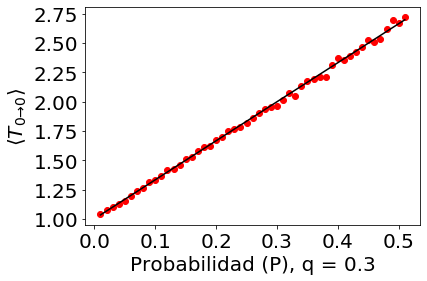

In [15]:
#Comparacion de probabilidad con la teoria 
plt.plot(probabilidad, tiempo_promedio, 'ro')
plt.plot(probabilidad, (probabilidad + 0.3)/0.3, 'k-')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Probabilidad (P), q = 0.3", size = 20)
plt.ylabel(r'$ \langle T_{0 \to 0} \rangle $', size = 20)
plt.show()

In [17]:
#Ahora haremos un histograma de cada p
X = pd.DataFrame(X)
probs = X[0].unique()

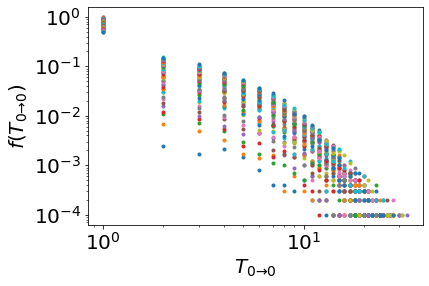

In [21]:
#Probabilidad para p
for i in probs:
    tiempo_medio = X[X[0] == i][1].value_counts().index
    frecuencia = X[X[0] == i][1].value_counts().values
    plt.loglog(tiempo_medio, frecuencia/sum(frecuencia), '.', label = i)
    #plt.plot(tiempo_medio, np.exp(-i*tiempo_medio)/np.sum(np.exp(-i*tiempo_medio)))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel(r"$T_{0 \to 0}$", size = 20)
plt.ylabel(r'$f(T_{0 \to 0})$', size = 20)
#plt.legend()
#plt.set( ylim=(-100, 100))
plt.show()

# Caminante Aleatorio anillo

In [ ]:
DF = pd.DataFrame()

In [ ]:
#Leemos los DataFrames
for i in glob.glob('./Results/*.dat'):
    data = pd.read_csv(i)
    data['Node'] = int(re.findall(r'\d+',i)[0])
    DF =  pd.concat([DF,data],ignore_index=True)

In [ ]:
#Separamos nodos y tiempo
nodes = DF.groupby('Node').mean().sort_index().index
times = DF.groupby('Node').mean().sort_index().values

In [ ]:
#Graficamos Nodes contra tiempos promedios
plt.plot(nodes,times,'k.')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel(r'$ \langle T_{ij} \rangle $')
plt.xlabel(r'# Nodes')
plt.show()

In [ ]:
#Graficamos la distribucion al nodo 1
df = DF[DF.Node == 1].TIME.value_counts()
tiempo_medio = df.index
frecuencia = df.values
plt.loglog(tiempo_medio,frecuencia,'.')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Frecuencia')
plt.xlabel('<T>')

In [ ]:
#Graficamos las distribuciones
for i in DF.Node.unique():
    df = DF[DF.Node == i].TIME.value_counts()
    tiempo_medio = df.index
    frecuencia = df.values
    plt.loglog(tiempo_medio,frecuencia,'.')
plt.ylabel('Frecuencia')
plt.xlabel('<T>')